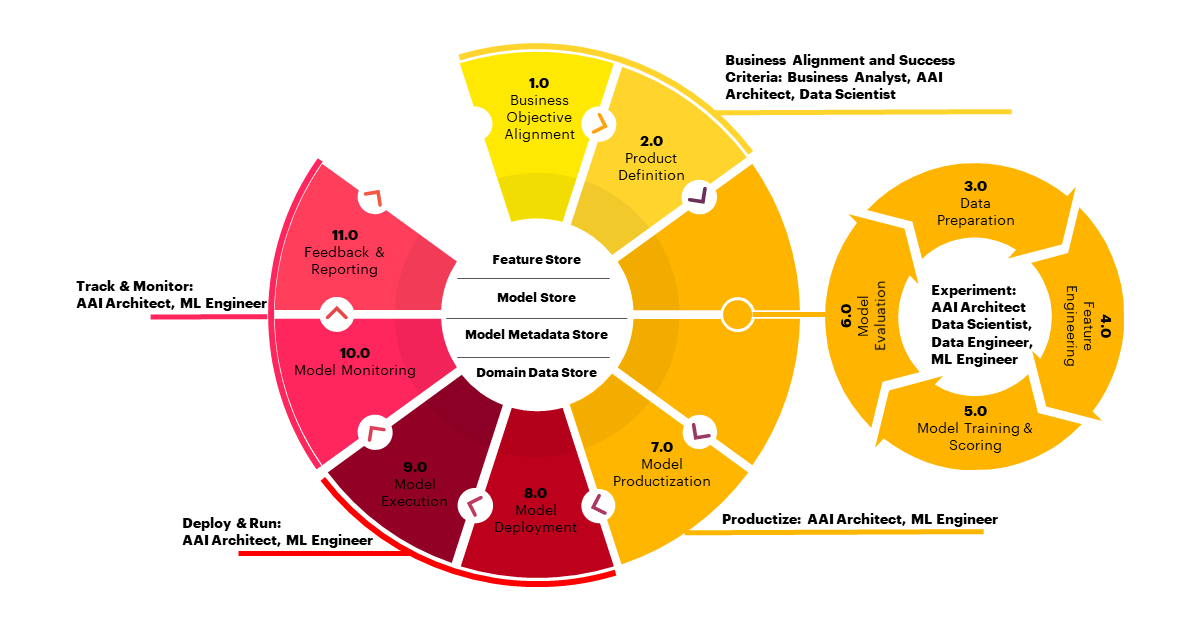

In [78]:
from IPython.display import Image
Image("https://databricks.com/wp-content/uploads/2020/03/blog-pie-charts.png")

# Exploratory Data Analysis 
### Art of finding or extracting the insights from data
#### These insights could be helpful to understand the behavior, solve a problem, build a story line. All this analysis would be helpful to build ML/AI models down the line.





### Exploratory data analysis is a topic with a lot of breadths. There are some common practices followed here as well, but sometimes, it also tends to get a bit  subjective depending on the data or the business problem you are working on. 

### Hence, today we will not (or very less) code to do EDA, but to focus more on the methodologies and practices to follow while performing exploratory data analysis on any data.

## Points to remember about EDA
    1. No Boundry (No Limit) of Analysis
    2. No fixed set of rules

## Common methods/terms/process that EDA begins with (but its not limited to)
    1. Collection of data (based on domain knowledge)
    2. Extract relavent data (itself an EDA)
    3. Cleaning or Correcting of Data
    4. Analysis on independent/dependent variables (Uni/Bi/Multivariate Analysis)
    5. Handling of Data (Removing/Imputing missing values [MCAR - Missing completely at random | MAR - Missing at random | MNAR - Missing not at random])
    6. Outliers Identification
    5. Plot various charts (visualization)
    6. Dimesion Reduction (PCA or t-SNE)

# Collection of data and Extract relevant data
    1. Data is properly managed and maintained and is available for analysis (Telecom Industry)
    2. You do not have data at all for the problem (Covid-19 Analysis) or company can not share it
    3. Unstructred Data (images, audio, video, text etc)



## It is very important to find the relevant data for the problem otherwise you can get easily lost in the space of data. 



## Problems with datasets -
    1. Authenticity of dataset
    2. Domain Knowledge
    3. Unavailabiltiy of dataset
    4. Encoded dataset
    5. Merge or merged datasets


 # Cleaning the dataset
 ### We generally do following as a part of this step (but not limited to)
    1. Remove faulty columns and rows
    2. Remove duplicate information (row/columns)
    3. Merge, Split columns
    4. Change datatype of columns
    5. Remove unwanted rows information like headers/footers etc
    6. Create new columns
    7. Delete unwanted columns 
    8. Correct invalid data format, tranform column or standardize columns etc
 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('telemarketing.csv')
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [5]:
df = pd.read_csv('telemarketing.csv', header=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [11]:
# No need of customerid columns
# Split jobedu in two separate columns job and edu 
# Drop jobedu since it is no more needed
# Check contact column
# Check for missing values in each columns
# check for duplicate rows

# Correct wrong information 
## There can be cases in data where you have missing informaiton in it or wrong representation of value available or wrong format 
    1. Different datetime formats (01/Jan/2020, YY/MM/DD, MM/DD/YYYY, epoch number, ordinal number etc)
    2. Numeric having string or null
    3. String having numeric or null
    4. Different formats 
    5. Transform (or stadardise) columns value


# Handle Missing Value by Fill methods - Important to understand the nature of missing information
    1. For numeric, Mean, Median, Mode, ML models
    2. For string, Less occuring, most occuring, nearby values (up/down rows), most matching/similar
    3. Information from other data sources

# Handle missing values by droping
- Check % of missing values (can be done for big datasets but  is it true for small datasets as well ?)
- take a call based on domain knowledge to drop or not
- check consequences of filling or impute information (eg. Temperature anomaly detection - filling values with average would do ....??? )

In [ ]:
machine - truth

mechine - value   - 95%

In [14]:
# Droping age columns based on domain knowledge that small number of age missing values does not make any difference in dataset
df = df[~df.age.isna()]
df.shape

(45191, 19)

# Outlier detection (a very important piece in this art)
## values far from the truth - height of a man is 100 meters
## realistic assumptions - temperature of device would be only 40-70 degree Celsius, but you get few records way less (10*c) or more (100*c)
## value is true but occurence is very less and affects badly - adding income of Ambani to calculate average income of indian people 

In [89]:
x = np.random.randint(0,10, 100).tolist()
x.append(5000)
y = np.zeros_like(x) #np.random.randint(1,2,101).tolist()

,X
X,1.0


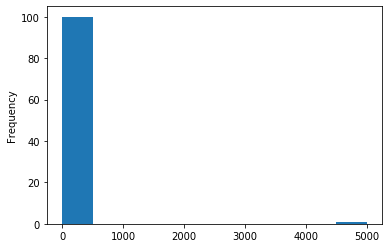

In [93]:
import pandas as pd
df = pd.DataFrame(x, columns=['X'])
df.X.plot(kind="hist")
df.corr()

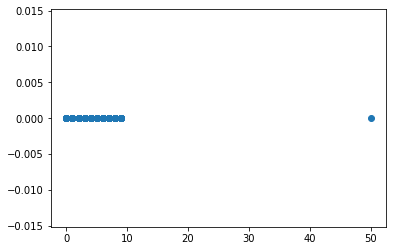

In [75]:
# plt.plot(x)
plt.scatter(x,y)

# Handle Outliers
    1. There is no certain way of doing it
    2. Many times it depends on domain knowledge
    3. Sometimes you may find true outliers (height of person is 100 meters)
    4. sometimes one variable may appear to be have outlier but in actual it is not (heights of person mesaured in milimeters rathen than centi meters)
    5. correct formats, standardise columns 
    6. Remove outliers (depends on problem you want to analyze) (tax collection vs income example, you can not remove Ambani)    


# Univariate analysis (which we have been doing so far) however
    a) include statistcs mean, median, mode, sd, variance, pdf, cdf
    b) plots (bar, pie, box, violin etc)

### These will help yoy to visualize findings and write a story about the dataset

# Bi/Multivariate Analysis
### it includes anlysis using two or more variables irrespective of types
    1. numeric vs numeric
    2. numeric vs categorical
    3. categorical vs categorical

### how to do it ?
    1. Correlation matrix
    2. pairplots

## Causation vs Correlation


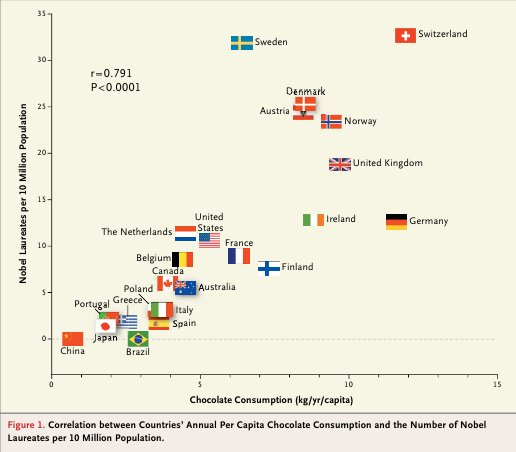

In [77]:
from IPython.display import Image
Image("https://i.stack.imgur.com/TWQaB.jpg")
# https://stats.stackexchange.com/questions/36/examples-for-teaching-correlation-does-not-mean-causation

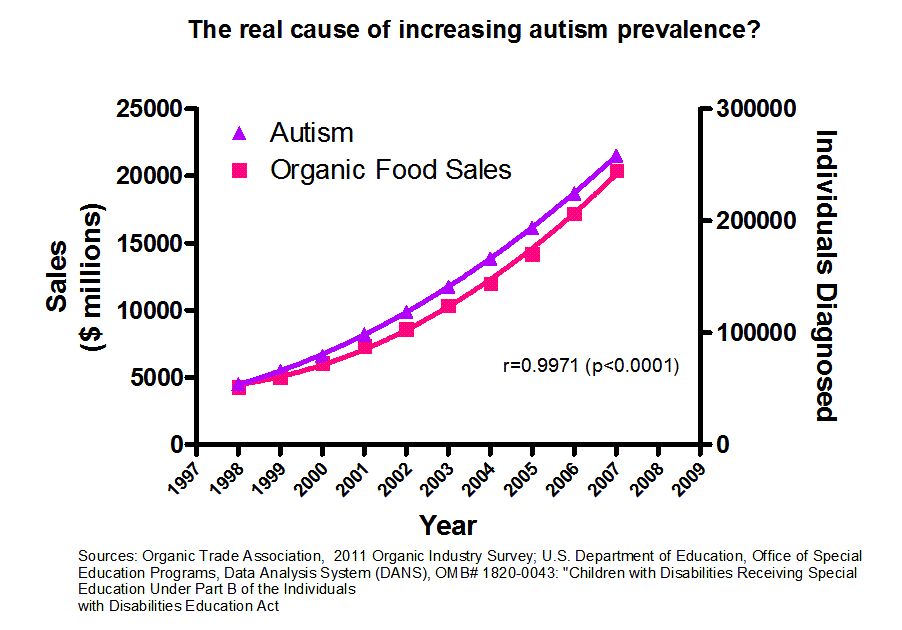

In [79]:
from IPython.display import Image
Image("https://i.stack.imgur.com/9kcsT.png")